# Esercizio 10.1

Il programma è analogo a quello dell'esercizio 9.1. Anche qui ho utilizzato il file *CityGenerator.cpp* per generare la configurazione delle città, mentre il file *main.cpp* risolve il problema del commesso viaggiatore. 
A seconda del tipo di disposizione delle città richiesta (su circonferenza o dentro quadrato) si modifica la variabile booleana circle nel file *main.h*.
Sono state qui definite anche: NCity=30, beta=1, il numero di temperature che si desiderano esplorare: NTemp=2000, e il numero di modifiche proposte per ogni temperatura: NStep=1000.

Quindi, dopo aver creato il percorso casuale che unisce le città *Path*, si propone una modifica del percorso a cui si è arrivati con la chiamata della funzione *Mutation*. Grazie all'algoritmo di Metropolis si decide se rifiutare o accettare la mossa, usando come probabilità di transizione:

$$ P = e^{-\beta(Length_{(Proposed Path)}-Length_{(Actual Path)})} $$

Dopo *NStep* con lo stesso *beta*, inizialmente fissato a 1 si aumenta il suo valore in modo da diminuire la probabilità di accettare nuove mosse con la legge $\beta \>\cdot= 1.003$. In questo modo la crescita della temperatura è sufficientemente lenta da permettere al sistema di espolare una vasta zona dello spazio dei parametri durante i primi tentativi.
Possiamo quindi così cercare il percorso migliore. 
Nel file *Best.dat* è salvato, per ogni percorso visitato, il *beta* con cui è stato ottenuto e la sua lunghezza.

Lo stesso codice è stato utilizzato sia per la ricerca su circonferenza che nel quadrato.

## Circonferenza

I grafici di seguito rappresentano la lunghezza del percorso in ogni step e il valore di beta in ogni step.

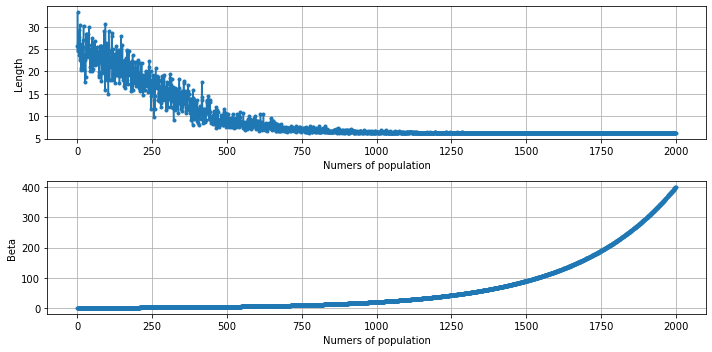

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(10, 5))

beta,best = np.loadtxt("10.1/Circonferenza/Best.dat", usecols=(0,1), delimiter='	', unpack='true')

plt.subplot(2, 1, 1)
plt.plot(best, '.-')
plt.xlabel('Numers of population')
plt.ylabel('Length')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(beta, '.-')
plt.xlabel('Numers of population')
plt.ylabel('Beta')
plt.grid(True)

plt.tight_layout()
#plt.savefig("./pictures/BestTripsLength.png")

plt.show()

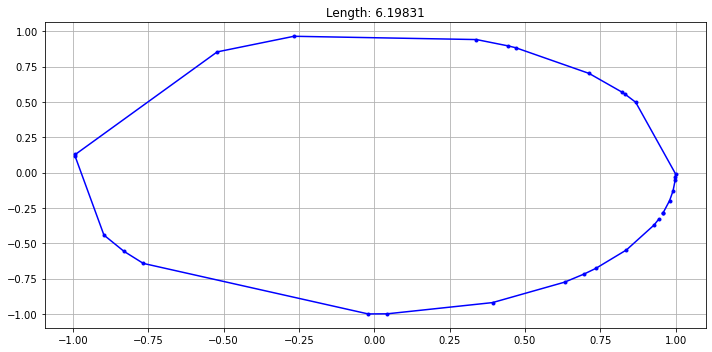

In [33]:
import string
fig=plt.figure(figsize=(10, 5))

i, x, y = np.loadtxt("10.1/Circonferenza/BestTrip.dat", usecols=(0,1,2), delimiter='	', unpack='true')

title = str(np.loadtxt("10.1/Circonferenza/BestLength.dat"))
plt.plot(x,y,'.-b')
plt.title('Length: '+title)
plt.grid()

plt.tight_layout()
#plt.savefig("./pictures/BestTrips.png")

plt.show()

## Quadrato

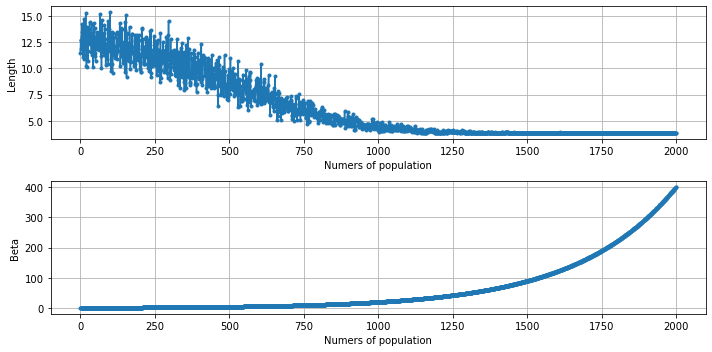

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(10, 5))

beta,best = np.loadtxt("10.1/Best.dat", usecols=(0,1), delimiter='	', unpack='true')

plt.subplot(2, 1, 1)
plt.plot(best, '.-')
plt.xlabel('Numers of population')
plt.ylabel('Length')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(beta, '.-')
plt.xlabel('Numers of population')
plt.ylabel('Beta')
plt.grid(True)

plt.tight_layout()
#plt.savefig("./pictures/BestTripsLength.png")

plt.show()

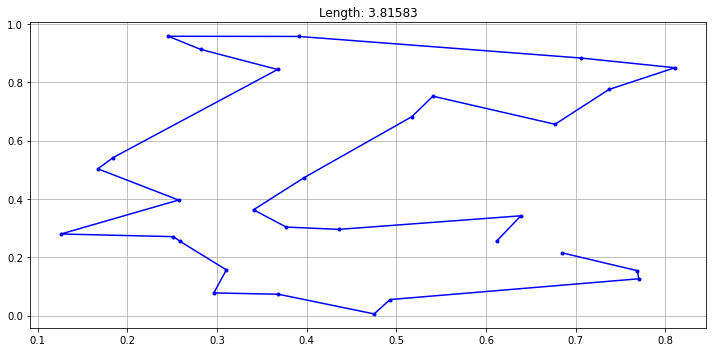

In [35]:
import string
fig=plt.figure(figsize=(10, 5))

i, x, y = np.loadtxt("10.1/BestTrip.dat", usecols=(0,1,2), delimiter='	', unpack='true')

title = str(np.loadtxt("10.1/BestLength.dat"))
plt.plot(x,y,'.-b')
plt.title('Length: '+title)
plt.grid()

plt.tight_layout()
#plt.savefig("./pictures/BestTrips.png")

plt.show()

# Esercizio 10.2

Utilizzando il codice precedente, sfruttiamo le funzioni della libreria *mpi.h* per risolvere il problema del commesso viaggiatore utilizzando 4 core di calcolo.
In particolare, quando ogni core è giunto alla fine del processo di ottimizzazione le lunghezze dei percorsi ottenuti sono passate, attraverso la funzione *MPI_Gather*, al core 0 e il percorso ottenuto viene stampato sul file *BestTrip.dat*.

Riportiamo di seguito: nel primo grafico il percorso ottenuto e successivamente l'evoluzione della lunghezza del percorso e dell'inverso della temperatura salvate dal processore che ha ottenuto il risultato migliore.

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import string

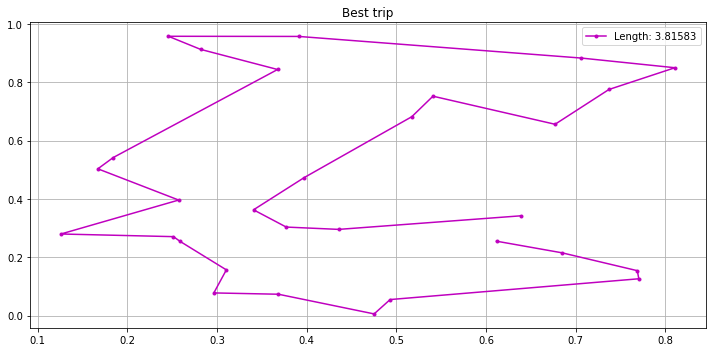

In [37]:
fig=plt.figure(figsize=(10, 5))

i, x, y = np.loadtxt("10.2/BestTrip.dat", usecols=(0,1,2), delimiter='	', unpack='true')
best_length,rank = np.loadtxt("10.2/BestLength.dat", usecols=(0,1), delimiter='	', unpack='true')

plt.plot(x,y,'.-', color = 'm', label='Length: '+str(best_length))
plt.title('Best trip')
plt.legend()
plt.grid()

plt.tight_layout()

plt.show()

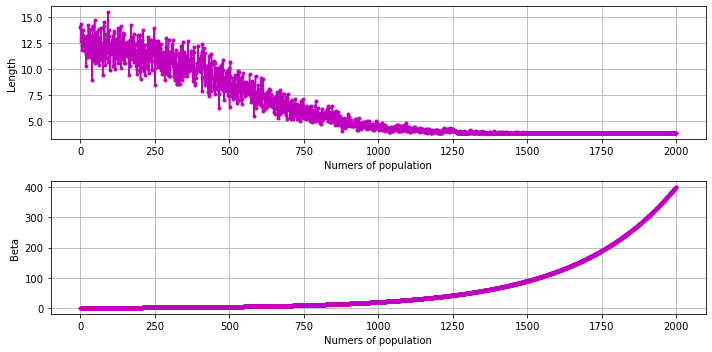

In [38]:
fig=plt.figure(figsize=(10, 5))

beta,length = np.loadtxt("10.2/Length"+str(int(rank))+".dat", usecols=(0,1), delimiter='	', unpack='true')

plt.subplot(2, 1, 1)
plt.plot(length,'.-', color = 'm')
plt.xlabel('Numers of population')
plt.ylabel('Length')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(beta,'.-', color = 'm')
plt.xlabel('Numers of population')
plt.ylabel('Beta')
plt.grid(True)

plt.tight_layout()

plt.show()